<a href="https://colab.research.google.com/github/bluwukami/Thinkful-Data-Analytics---Capstone-III/blob/main/Capstone_III_Chipset_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Doing all imports here to keep page organized
from sqlalchemy import create_engine
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
sns.set()

# Import CSV file from GitHub URL link
url = "https://raw.githubusercontent.com/bluwukami/Thinkful-Data-Analytics---Capstone-III/Hotfix-12-22-22/chip_dataset.csv"
chipset_df = pd.read_csv(url)
drop_chipset = chipset_df.dropna()

# Data Context:
This dataset by Michael Bryant ([seen here on Kaggle](https://www.kaggle.com/datasets/michaelbryantds/cpu-and-gpu-product-data)) compares CPUs, GPUs, and their numerous specs among them such as frequency clocks, transistor counts, die size etc.

Below is a list of variables and a brief explanation for each variable.

| Variable              | Quantitative or Qualitative | Variable Type | Notes                                                                                          |
|-----------------------|-----------------------------|---------------|------------------------------------------------------------------------------------------------|
| Product               | Qualitative                 | Nominal       | Name of the chipset.                                                                           |
| Type                  | Qualitative                 | Binary        | CPU, Central Processing Unit or <br>GPU, Graphics Processing Unit.                             |
| Release Date          | Quantitative                | Continuous    | Date that the chipset was first <br>sold to public.                                            |
| Process Size (nm)     | Quantitative                | Continuous    | Fabrication process and gap<br>length between transistors.                                     |
| TDP (W)               | Quantitative                | Continuous    | Total Draw Power in Watts.                                                                     |
| Die Size (nm^2)       | Quantitative                | Continuous    | How much space the chipset<br>takes on a silicon wafer.                                        |
| Transistors (million) | Quantitative                | Continuous    | Semiconductor used to amplify <br>or switch signals and power.                                 |
| Freq (Mhz)            | Quantitative                | Continuous    | Short for "frequency". Measures<br>speed that chipset can process<br>a clock cycle per second. |
| Foundry               | Qualitative                 | Nominal       | Fabrication plant of chipset.                                                                  |
| Vendor                | Qualitative                 | Nominal       | Manufacturer of chipset.                                                                       |
| FP16 GFLOPS           | Quantitative                | Continuous    | 16-bit Giga Floating Point Operations<br>Per Second. Used to measure<br>computing performance. |
| FP32 GFLOPS           | Quantitative                | Continuous    | 32-bit Giga Floating Point Operations<br>Per Second.                                           |
| FP64 GFLOPS           | Quantitative                | Continuous    | 64-bit Giga Floating Point Operations<br>Per Second.                                           |

# Research/Business Objectives:
Moore’s Law states that roughly every two years, the amount of transistors on a microchip doubles. First inquiry I want to explore is if there’s any correlation between frequency and transistor count. Second, is there any correlation between frequency and GLFOPS?

Businesses and customers that are purchasing components will want to see how long they can expect their hardware to last before needing to upgrade. They should also find the results of the frequency/GFLOPs test useful for better purchasing decisions when looking at product spec sheets.

# Hypotheses from Data:
**Hypothesis #1**:There's a correlation between frequency and transistor count. Higher transistor counts should lead to higher frequency clocks.

**Expected result**: There shouldn't be a correlation since there are various GPU/CPUs that have similar transistor counts, yet have different frequency clock speeds. <br><br>

**Hypothesis #2**: There is no correlation between frequency and various GPU GFLOPS (FP16, FP32 etc).

**Expected result**: There shouldn't be a correlation since there are various GPUs that have similar frequency clock speeds yet have different rated GFLOPS.


In [ ]:
# Decimal set to 2 digits
pd.set_option('display.float_format', lambda x: '%.2f' % x)
chipset_df.head()

# Replace null values with string "N/A"
chipset_df.replace(np.nan, 'N/A', regex=True)

,Index,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
0,0,AMD Athlon 64 3500+,CPU,2007-02-20,65.00,45.00,77.00,122.00,2200.00,Unknown,AMD,N/A,N/A,N/A
1,1,AMD Athlon 200GE,CPU,2018-09-06,14.00,35.00,192.00,4800.00,3200.00,Unknown,AMD,N/A,N/A,N/A
2,2,Intel Core i5-1145G7,CPU,2020-09-02,10.00,28.00,N/A,N/A,2600.00,Intel,Intel,N/A,N/A,N/A
3,3,Intel Xeon E5-2603 v2,CPU,2013-09-01,22.00,80.00,160.00,1400.00,1800.00,Intel,Intel,N/A,N/A,N/A
4,4,AMD Phenom II X4 980 BE,CPU,2011-05-03,45.00,125.00,258.00,758.00,3700.00,Unknown,AMD,N/A,N/A,N/A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4849,4849,NVIDIA Quadro 3000M,GPU,2011-02-22,40.00,75.00,332.00,1950.00,450.00,TSMC,NVIDIA,N/A,432.00,36.00
4850,4850,Intel GMA 950,GPU,2005-06-01,90.00,7.00,N/A,N/A,250.00,Intel,Intel,N/A,N/A,N/A
4851,4851,NVIDIA GeForce GT 320M,GPU,2010-03-03,40.00,23.00,100.00,486.00,500.00,TSMC,NVIDIA,N/A,52.80,N/A
4852,4852,NVIDIA GeForce FX 5200,GPU,2003-03-06,150.00,N/A,65.00,29.00,250.00,TSMC,NVIDIA,N/A,N/A,N/A


In [ ]:
# Listing basic info of chipset_df
chipset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Index                  4854 non-null   int64  
 1   Product                4854 non-null   object 
 2   Type                   4854 non-null   object 
 3   Release Date           4854 non-null   object 
 4   Process Size (nm)      4845 non-null   float64
 5   TDP (W)                4228 non-null   float64
 6   Die Size (mm^2)        4139 non-null   float64
 7   Transistors (million)  4143 non-null   float64
 8   Freq (MHz)             4854 non-null   float64
 9   Foundry                4854 non-null   object 
 10  Vendor                 4854 non-null   object 
 11  FP16 GFLOPS            536 non-null    float64
 12  FP32 GFLOPS            1948 non-null   float64
 13  FP64 GFLOPS            1306 non-null   float64
dtypes: float64(8), int64(1), object(5)
memory usage: 531.0+ 

In [ ]:
# Showing basic statistics for chipset_df
chipset_df.describe()

,Index,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
count,4854.00,4845.00,4228.00,4139.00,4143.00,4854.00,536.00,1948.00,1306.00
mean,2426.50,55.11,81.36,188.44,1929.92,1484.41,8397.46,2134.76,363.67
std,1401.37,45.00,76.81,126.19,4044.89,1066.70,13799.55,3898.43,1145.93
min,0.00,0.00,1.00,1.00,8.00,100.00,10.02,12.80,3.60
25%,1213.25,22.00,33.00,104.00,154.00,590.00,768.80,257.30,38.30
50%,2426.50,40.00,65.00,148.00,624.00,1073.50,2965.50,696.00,89.28
75%,3639.75,90.00,100.00,239.00,1550.00,2400.00,10600.00,2116.75,220.00
max,4853.00,250.00,900.00,826.00,54200.00,4700.00,184600.00,40000.00,11540.00


In [ ]:
# Show chipsets that have at least one variable that is null
chipset_df[chipset_df.isnull().any(axis=1)]

# Replace null values with string "N/A"
chipset_df.replace(np.nan, 'N/A', regex=True)

,Index,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
0,0,AMD Athlon 64 3500+,CPU,2007-02-20,65.00,45.00,77.00,122.00,2200.00,Unknown,AMD,N/A,N/A,N/A
1,1,AMD Athlon 200GE,CPU,2018-09-06,14.00,35.00,192.00,4800.00,3200.00,Unknown,AMD,N/A,N/A,N/A
2,2,Intel Core i5-1145G7,CPU,2020-09-02,10.00,28.00,N/A,N/A,2600.00,Intel,Intel,N/A,N/A,N/A
3,3,Intel Xeon E5-2603 v2,CPU,2013-09-01,22.00,80.00,160.00,1400.00,1800.00,Intel,Intel,N/A,N/A,N/A
4,4,AMD Phenom II X4 980 BE,CPU,2011-05-03,45.00,125.00,258.00,758.00,3700.00,Unknown,AMD,N/A,N/A,N/A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4849,4849,NVIDIA Quadro 3000M,GPU,2011-02-22,40.00,75.00,332.00,1950.00,450.00,TSMC,NVIDIA,N/A,432.00,36.00
4850,4850,Intel GMA 950,GPU,2005-06-01,90.00,7.00,N/A,N/A,250.00,Intel,Intel,N/A,N/A,N/A
4851,4851,NVIDIA GeForce GT 320M,GPU,2010-03-03,40.00,23.00,100.00,486.00,500.00,TSMC,NVIDIA,N/A,52.80,N/A
4852,4852,NVIDIA GeForce FX 5200,GPU,2003-03-06,150.00,N/A,65.00,29.00,250.00,TSMC,NVIDIA,N/A,N/A,N/A


# Hypothesis #1:
There's a correlation between frequency and transistor count. Higher transistor counts should lead to higher frequency clocks.

Text(0.5, 1.025, 'Relationship Between Frequency and Transistors')

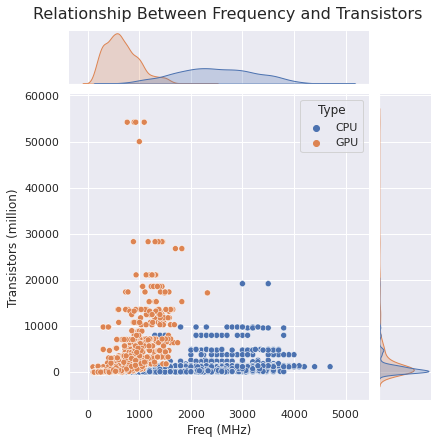

In [ ]:
# Importing matplot
import matplotlib.pyplot as plt

# Create scatterplot to show correlation
df_plot = sns.jointplot(
          data=chipset_df, 
          hue="Type", 
          y="Transistors (million)",
          x="Freq (MHz)",
)

# Add title and move it upwards to avoid clashing
plt.suptitle("Relationship Between Frequency and Transistors",
          y=1.025,
          fontsize=16
)

In [ ]:
# Decimal set to 4 digits going forward
pd.set_option('display.float_format', lambda x: '%.4f' % x)

# Descriptive stats for variables
chipset_df[["Freq (MHz)", "Transistors (million)"]].describe()

,Freq (MHz),Transistors (million)
count,4854.0000,4143.0000
mean,1484.4061,1929.9223
std,1066.7015,4044.8911
min,100.0000,8.0000
25%,590.0000,154.0000
50%,1073.5000,624.0000
75%,2400.0000,1550.0000
max,4700.0000,54200.0000


In [ ]:
# Correlations between variables
chipset_df[["Freq (MHz)", "Transistors (million)"]].corr()

,Freq (MHz),Transistors (million)
Freq (MHz),1.0000,0.0176
Transistors (million),0.0176,1.0000


In [ ]:
# Calculate P values of freq/transistors
stats.pearsonr(drop_chipset["Freq (MHz)"], drop_chipset["Transistors (million)"])

(0.18761148095922384, 9.433787120747038e-05)

#Summary of findings for Hypothesis #1:
The scatterplot shown above shows that there is no significant correlation between frequencies and transistor counts. There are multiple chipsets that have similar transistors yet drastically different frequencies. **Hypothesis not supported.**

#Hypothesis #2:
There is a correlation between frequency and various GPU GFLOPS (FP16, FP32 etc).

Text(0.5, 1.085, 'Relationship Between Frequency and GPU GFLOPS')

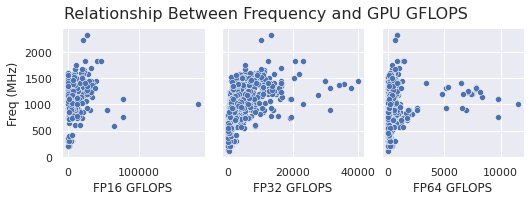

In [ ]:
# Create scatterplots to show correlation
df_gflops = sns.pairplot(
          data=chipset_df, 
          x_vars=["FP16 GFLOPS", "FP32 GFLOPS", "FP64 GFLOPS"],
          y_vars=["Freq (MHz)"]
)


# Add title and move it upwards to avoid clashing
plt.suptitle("Relationship Between Frequency and GPU GFLOPS",
          y=1.085,
          fontsize=16
)

In [ ]:
# Descriptive stats for variables
chipset_df[["Freq (MHz)", "FP16 GFLOPS", "FP32 GFLOPS", "FP64 GFLOPS"]].describe()

,Freq (MHz),FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
count,4854.0000,536.0000,1948.0000,1306.0000
mean,1484.4061,8397.4599,2134.7567,363.6705
std,1066.7015,13799.5511,3898.4315,1145.9319
min,100.0000,10.0200,12.8000,3.6000
25%,590.0000,768.8000,257.3000,38.2950
50%,1073.5000,2965.5000,696.0000,89.2800
75%,2400.0000,10600.0000,2116.7500,220.0000
max,4700.0000,184600.0000,40000.0000,11540.0000


In [ ]:
# Correlations between variables
chipset_df[["Freq (MHz)", "FP16 GFLOPS", "FP32 GFLOPS", "FP64 GFLOPS"]].corr()

,Freq (MHz),FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
Freq (MHz),1.0000,0.2763,0.5824,0.1904
FP16 GFLOPS,0.2763,1.0000,0.7285,0.6829
FP32 GFLOPS,0.5824,0.7285,1.0000,0.5196
FP64 GFLOPS,0.1904,0.6829,0.5196,1.0000


In [ ]:
# Calculate P values for Freq/GFLOPS
stats.pearsonr(drop_chipset["Freq (MHz)"], drop_chipset["FP16 GFLOPS"])

(0.20294152799707768, 2.3337070060016792e-05)

In [ ]:
stats.pearsonr(drop_chipset["Freq (MHz)"], drop_chipset["FP32 GFLOPS"])

(0.40215232175826915, 4.55662356420494e-18)

In [ ]:
stats.pearsonr(drop_chipset["Freq (MHz)"], drop_chipset["FP64 GFLOPS"])

(0.10854856171465495, 0.024720531015487636)

#Summary of Findings for Hypothesis #2:
The scatterplot shown above shows that there is a slight to moderate correlation between frequency and GFLOPS. FP 16 and FP32 GFLOPS correlates with frequency clocks. P values were all greater than 0.05. **Hypothesis supported.**

#Summary of Findings and Conclusion:
We found that frequency isn't strongly correlated with  transistor count. However, there was a slight to moderate correlation with frequency and GFLOPS. Consumers and/or businesses should look into raw performance (GLFOPS) and price when deciding to purchase new chipsets.